<center><img src="https://storage.googleapis.com/www-theplayerstribune-com/uploads/GettyImages-492684424-1.jpg" width="836" height="400"></center>
<h1><center>Predicting MLB Teams' Regular Season Win Totals</center></h1>
<h4><center>CMSC320 Final Tutorial by Jason Schneider</center></h4>
<hr>
<h2><center>An Introduction</center></h2>
<p>
    Predicting the outcomes of sporting events has been a hobby of sports fan and analysts for nearly as long
    as sport itself.  Predicting sports outcomes is a crucial element of popular sports television like ESPN,
    sports gambling, fantasy sports, and coaching purposes.  Out of all sports today, baseball, namely MLB
    (Major League Baseball), is currently the statistically-driven sport in America.  This is thanks to the
    statistical revolution started by Bill James and was popularized by the Oakland Athletics' General Manager: Billy
    Beane.  We explored Billy Beane and his application of data science and sabermetrical analysis in Project 2
    earlier this semester, but the applications of sabermetrical analysis of baseball go beyond confirming a bias
    between poor and rich teams.  We can use it to create a predictive model for various questions as well.  The
    question we want to answer here is: <strong>How can we accurately predict the number of regular season wins every
    MLB team will have next season?
    </strong>
    <br><br>
    Luckily, with the advancements in computational technologies, this and many more questions can be answered to
    various degrees of accuracy.  While there are many, many methods and models out there that all argue they are
    the "most accurate," claim to "involve the latest trends in statistics," and "the most up-to-date techniques,"
    there is no mathematical model that can 100% accurately predict every result.  There's an old saying that
    <i>anything can happen in baseball</i>.  What we hope to accomplish here is find a way to get as close to 100%
    accuracy as possible.  In this tutorial, we will divise our own methods, statistics, and trends to base our model
    off of, different from those that already exist so we can use our own research to try to create the most accurate
    model possible, but also more simple so that it is easier for readers of this tutorial to follow along.
</p>
<hr>
<h2><center>Table of Contents</center></h2>
<ul>
    <li><strong>1 -> Getting Started</strong>
        <ul>
            <li>1.1 -> <i>Required Libraries</i></li>
            <li>1.2 -> <i>Data Sources Used & Data Required</i></li>
            <li>1.3 -> <i>Scraping, Loading, and Formatting Data</i></li>
            <li>1.4 -> <i>End Goal Product</i></li>
        </ul>
    </li>
    <li><strong>2 -> What Statistics Contribute to More Wins?</strong>
        <ul>
            <li>2.1 -> <i>Choosing a Starting Point</i></li>
            <li>2.2 -> <i>Example of Relationship Analyzation: Batting Average!</i></li>
            <li>2.3 -> <i>Relationship: Runs Scored and Wins</i></li>
            <li>2.4 -> <i>Relationship: WHIP and Wins</i></li>
            <li>2.5 -> <i>Relationship: WAR and Wins</i></li>
        </ul>
    </li>
    <li><strong>3 -> Putting It All Together</strong>
</ul>
<hr>

<h2><center>1 Getting Started</center></h2>

<h3>1.1 Required Libraries</h3>
<p>
    The required import libraries and matplotlib settings for this project are shown below with a brief description
    of their purpose (text in parenthesis represents alias used for import):
</p>
<ul>
    <li><b>Math <small>(math)</small>: </b>General math-based functionality not included in vanilla Python 3</li>
    <li><b>Regular Expressions <small>(re)</small>: </b>Regular Expression and replacement operations</li>
    <li><b>Requests <small>(rq)</small>: </b>GET Requests to data source sites</li>
    <li><b>Pandas <small>(pd)</small>: </b>Scraping, Manipulating, displaying, and formatting data</li>
    <li><b>Numpy <small>(np)</small>: </b>Sabermetrical analysis and aiding in matrix use</li>
    <li><b>Matplotlib's Pyplot <small>(pypt)</small>: </b>Basic graphing, plotting, and data analysis</li>
    <li><b>Seaborn <small>(sea)</small>: </b>More robust graphing, plotting, and modelling tools</li>
    <li><b>scikit-learn's linear_model <small>(lmod)</small>: </b>Aids in creating linear models involved in
    tutorial</li>
    <li><b>BeautifulSoup4 <small>(bsoup)</small>: </b>Scraping and importing data for use with Pandas</li>
    <li><b>Scipy's Pearson Correlation <small>(pr)</small>: </b>Validating relationships between certain
    stats/attributes and wins</li>
    <li><b>Statsmodels's api <small>(sm)</small>: </b>Performing Multiple Linear Regression in our "research"</li>
    <li><i>%matplotlib inline: </i>Ensure that any Matplotlib plots are printed inline for notebook</li>
</ul>

In [1]:
# Imports for all required libraries:

import math
import re
import requests as rq
import pandas as pd
import numpy as np
import matplotlib.pyplot as pypt
import seaborn as sea
from sklearn import linear_model as lmod
from bs4 import BeautifulSoup as bsoup
from scipy.stats import pearsonr as pr
from statsmodels import api as sm
%matplotlib inline

<h3>1.2 Data Source Used & Data Required</h3>
<h4><center>Data Source Used</center></h4>
<p>
    The data source that we will be using is: <b><i><a href="https://www.baseball-reference.com/">Baseball
    Reference</a></i></b>.
    <br><br>
    <b><i>Baseball Reference</i></b> is a fantastic website and robust, expansive statistics data source for a 
    wide range of baseball fans: from those who just picked their favorite team to those who want the edge in all 10 
    of their fantasy baseball leagues.  In addition, it is very friendly to data scraping and has a clear, usable 
    HTML DOM structure.  In a sense, it can be considered the <i>Baseball Wikipedia</i>.
    <br><br>
    Baseball Reference was launched in 2000 by Sean Forman, a Mathematics Professor at St. Joseph's University and
    baseball researcher.
</p>
<br>
<h4><center>Data Required</center></h4>
<p>
    The data involved in predicting season win totals varies between every implementation of this idea.  Why?
    <strong>Briefly, every implementation places different emphasis of contrubtion for different 
    correlations.</strong>  Our basic model will look much different than by companies who spend millions of dollars
    into researching but that doesn't mean we can't make an effective predictive model without doing so.
    <br><br>
    While the actual specific data within these categories will be explored and explained later, the types of data we 
    will be interested in retrieving are:
    <ul>
        <li><b>Constant Data:</b>
            <ul>
                <li>Team Names</li>
                <li>Divisions</li>
                <li>Leagues</li>
            </ul>
        </li>
        <li><b><i>n</i> Previous Seasons:</b>
            <ul>
                <li>Win-Loss Record and Ratio</li>
                <li>Regular Season Game Logs, containing things like (but not limited too)
                    <ul>
                        <li>Box Score</li>
                        <li>Game Time and Length</li>
                        <li>Weather</li>
                        <li>Player Performances</li>
                        <li><i>etc...</i></li>
                    </ul>
                </li>
                <li>Team Performance Statistics</li>
                <li>Player Performance Statistics</li>
            </ul>
        </li>
    </ul>
    <br>
</p>
<h4><center>Things to Keep In Mind</center></h4>
<p>
    We might not end up using all of this information if we find in our investigations that they are not needed, but
    this is a good general starting list for really any sport: Baseball, Football, Basketball, Hockey, Soccer, you
    name it.
    <br><br>
    <ul>
        <i>
        <li>For this tutorial, we will be using data from the last <b>n = 15</b> seasons by default, though more 
            or less data may make the resulting model more or less accurate.</li>
        <li>For the purposes of this tutorial, the divisions and leagues will be based offof the team names,
            divisions, and leagues as of the end of the 2019 MLB season.  That means that the change of Tampa Bay's
            name to the Rays and the Astros' move to the American League in 2013 are treated as if they always
            existed that way.</li>
        <li>Predictions and Past Data assumes that <b>162 Games</b> will be or were played, though this can change in
            rare cases like players union holdouts and tie-breaker games, which we will ignore as these are rather up
            to chance and are not up to our model to predict.</li>
        </i>
    </ul>
</p>

<h3>1.3 Scraping, Loading, and Formatting the Data</h3>
<p>
    Now it's time to get all of the juicy, raw data we want from Baseball Reference into usable, cleanly formatted
    pandas dataframes.  In order to do this, we need to make use of <code>requests</code>,
    <code>bs4</code> (BeautifulSoup4), and <code>pandas</code>.  We need to:
    <ol>
        <li>Use <b>requests</b> to: Send <b>GET</b> requests to Baseball Reference for multiple Baseball Reference
        pages <a href="https://www.baseball-reference.com/leagues/MLB/">MLB Team Win Totals</a> and MLB Season by
        Season Data for 2005 to 2019 seasons <a href="https://www.baseball-reference.com/leagues/MLB/2019.shtml">
        (2019 version as example)</a></li>
        <li>Use <b>bs4</b> to: Find and store table elements</li>
        <li>Use <b>pandas</b> to: Read html table elements into pandas dataframes, then to reformat and display data
    </ol>
    <br>
    We'll run through these steps with the constant data first as this is more straightforward and the we'll repeat
    these steps for past seasons data as it involves more steps.
</p>

In [2]:
# Dealing with the "Constant Data" from the MLB Team Win Totals page #

# GET Request for MLB Team Win Totals Page
req_teamwintotals = rq.get("https://www.baseball-reference.com/leagues/MLB/")

# Parses request as HTML and finds and stores the desired table element
root_teamwintotals = bsoup(req_teamwintotals.content, "html")
table_teamwintotals = root_teamwintotals.find("table")

# Read the html element then create dataframe.  We will use all pre-existing column names (as they are in a great
# format already) unless otherwise shown in code.
pdtable_twt = pd.read_html(str(table_teamwintotals))
df_twt = pdtable_twt[0]

# Our new dataframe looks like:
df_twt

,Year,G,ARI,ATL,BLA,BAL,BOS,CHC,CHW,CIN,...,PHI,PIT,SDP,SFG,SEA,STL,TBR,TEX,TOR,WSN
0,2019,162,85,97,NaN,54,84,84,72,75,...,81,69,70,77,68,91,96,78,67,93
1,2018,163,82,90,NaN,47,108,95,62,67,...,80,82,66,73,89,88,90,67,73,82
2,2017,162,93,72,NaN,75,93,92,67,68,...,66,75,71,64,78,83,80,78,76,97
3,2016,162,69,68,NaN,89,93,103,78,68,...,71,78,68,87,86,86,68,95,89,95
4,2015,162,79,67,NaN,81,78,97,76,64,...,63,98,74,84,76,100,80,88,93,83
5,2014,162,64,79,NaN,96,71,73,73,76,...,73,88,77,88,87,90,77,67,83,96
6,2013,163,81,96,NaN,85,97,66,63,90,...,73,94,76,76,71,97,92,91,74,86
7,2012,162,81,94,NaN,93,69,61,85,97,...,81,79,76,94,75,88,90,93,73,98
8,2011,162,94,89,NaN,69,90,71,79,79,...,102,72,71,86,67,90,91,96,81,80
9,2010,162,65,91,NaN,66,89,75,88,91,...,97,57,90,92,61,86,96,90,85,69


In [3]:
# Now that we have gotten the data, we need to clean it up so we can use it.  We need to remove the unnecessary BLA
# and G (Games Played) column (BLA is a team that only existed around the 1900s and we said G will "always" be 162), 
# replace missing data with np.nan, and limit this data to just the past 15 seasons (2005 to 2019 as of 12/16/19).
# Before we do any of that, we need to remove the repitition of the headers every 20 years.

df_twt = df_twt[df_twt.Year != "Year"]
df_twt = df_twt.drop(columns=["G", "BLA"])
df_twt = df_twt.replace("NaN", np.nan)
df_twt = df_twt.replace("", np.nan)
df_twt["Year"] = pd.to_numeric(df_twt["Year"])
df_twt = df_twt[df_twt["Year"] >= 2005]
df_twt = df_twt[df_twt["Year"] <= 2019]
df_twt = df_twt.sort_values("Year")
df_twt = df_twt.reset_index(drop = True)

# Here is our formatted, cleaned up dataframe for the MLB Team Team Win Totals data
df_twt

,Year,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,COL,...,PHI,PIT,SDP,SFG,SEA,STL,TBR,TEX,TOR,WSN
0,2005,77,90,74,95,79,99,73,93,67,...,88,67,82,75,69,100,67,79,80,81
1,2006,76,79,70,86,66,90,80,78,76,...,85,67,88,76,78,83,61,80,87,71
2,2007,90,84,69,96,85,72,72,96,90,...,89,68,89,71,88,78,66,75,83,73
3,2008,82,72,68,95,97,89,74,81,74,...,92,67,63,72,61,86,97,79,86,59
4,2009,70,86,64,95,83,79,78,65,92,...,93,62,75,88,85,91,84,87,75,59
5,2010,65,91,66,89,75,88,91,69,83,...,97,57,90,92,61,86,96,90,85,69
6,2011,94,89,69,90,71,79,79,80,73,...,102,72,71,86,67,90,91,96,81,80
7,2012,81,94,93,69,61,85,97,68,64,...,81,79,76,94,75,88,90,93,73,98
8,2013,81,96,85,97,66,63,90,92,74,...,73,94,76,76,71,97,92,91,74,86
9,2014,64,79,96,71,73,73,76,85,66,...,73,88,77,88,87,90,77,67,83,96


In [4]:
# Dealing with Previous Seasons' data, on the various MLB Season by Season data pages #

# Since we need to get data from multiple seasons and multiple tables from each season, we'll need to make use of
# loops and perform these steps on each table then stitch together and organize this data into a few more manageable
# "master" tables.

# We want to get and create dataframes for: Team Standard Batting, Team Standard Pitching, and the first two columns
# of MLB Wins Above Avg By Position (also known as WAR).  For purposes of this tutorial, we won't worry about fielding
# as WAR is a complex statistic (explained more later) that includes a player's fielding.  WAR will be explained more
# later, but it is a central statistic to our predictions and is something we will analyze thoroughly.

comments = re.compile("<!--|-->") # Need this to remove comments restricting us from scraping all tables
coldiv = []
df_master = pd.DataFrame()

for i in range(0, 33):
        coldiv.append("***")

for year in range(2005, 2020):
    # Send GET request for given year, then use BeautifulSoup to find root HMTL
    req_yearsbs = rq.get("https://www.baseball-reference.com/leagues/MLB/" + str(year) + ".shtml")
    root_yearsbs = bsoup(comments.sub("", str(req_yearsbs.content)), "html")
    alltables_year = root_yearsbs.findAll("table")
    
    # Create Batting Dataframe
    table_yearbatting = alltables_year[1]
    pdtable_yb = pd.read_html(str(table_yearbatting))
    df_yb = pdtable_yb[0]
    
    # Create Pitching Dataframe
    table_yearpitching = alltables_year[2]
    pdtable_yp = pd.read_html(str(table_yearpitching))
    df_yp = pdtable_yp[0]
    
    # Create WAR Dataframe
    table_yearwar = alltables_year[3]
    pdtable_yw = pd.read_html(str(table_yearwar))
    df_yw = pdtable_yw[0]
    
    # Consolidate all data into "season master table," which we then fill all empty cells and existing NaNs with
    # np.nan, remove all duplicate columns that repeat redundant info (renaming columns if necessary), then add
    # placeholder dividing columns so we can things easier for ourselves later.
    
    df_yearmaster = df_yb.join(df_yp, lsuffix = "_b", rsuffix = "_p").join(df_yw, lsuffix = "", rsuffix = "_w")
    df_yearmaster = df_yearmaster.loc[:,~df_yearmaster.columns.duplicated()]
    df_yearmaster = df_yearmaster.rename(columns = {"Tm_b" : "Tm"})
    df_yearmaster = df_yearmaster.drop(columns = ["Tm_p"])
    df_yearmaster.insert(30, "Col_Div1", coldiv)
    df_yearmaster.insert(67, "Col_Div2", coldiv)
    
    # Lastly we need to include the year next to each of these teams so we know what season this data is for
    include_year = []
    for k in range(0, 33):
        include_year.append(year)
    df_yearmaster.insert(0, "Year", include_year)
    
    # Now, if we've already created the dataframe for the first season, 2005, we need to start consolidating this
    # master SEASON dataframe into a master MASTER (aka dataframe showing all 15 seasons) dataframe by adding each
    # season's data to the bottom of the master df_master dataframe
    if year == 2005:
        df_master = df_yearmaster
    else:
        df_master = df_master.append(df_yearmaster)

# Need to make manual replacements to keep team names consistent, by changing Tampa Bay and Miami's modern team
# abbreviations
df_master = df_master.replace("TBD", "TBR")
df_master = df_master.replace("FLA", "MIA")
df_master = df_master.replace("NaN", np.nan)
df_master = df_master.replace("nan", np.nan)
df_master = df_master.replace("", np.nan)
df_master = df_master.reset_index(drop = True)

# This is our new master table of data for the 2005-2019 seasons:
df_master

,Year,Tm,#Bat,BatAge,R/G,G_b,PA,AB,R_b,H_b,...,1B,2B_w,3B_w,SS,LF,CF,RF,OF (All),DH,PH
0,2005,ARI,43,30.3,4.30,162,6327,5550,696,1419,...,STL5.8,PHI5.6,NYY6.7,ATL4.6,PIT2.6,ATL4.8,LAA3.0,ATL6.6,CLE2.7,PHI0.1
1,2005,ATL,45,28.1,4.75,162,6186,5486,769,1453,...,CHC5.5,BAL4.6,HOU4.1,BAL3.3,NYM2.6,CLE4.2,LAD2.3,PHI6.0,BOS2.5,TOR0.1
2,2005,BAL,46,31.5,4.50,162,6134,5551,729,1492,...,TEX4.2,ARI3.0,NYM2.8,CLE3.2,BOS2.0,PHI2.6,SDP2.3,CLE5.4,NYY0.1,BOS0.0
3,2005,BOS,52,31.3,5.62,162,6403,5626,910,1579,...,COL2.9,STL2.5,OAK1.9,OAK2.7,FLA1.9,KCR2.5,MIL2.2,BOS5.0,ARI0.0,CLE0.0
4,2005,CHC,46,29.8,4.34,162,6161,5584,703,1506,...,NYY1.5,LAA2.4,ATL1.7,PHI2.6,TBD1.9,STL2.5,SEA1.5,NYM3.5,MIL0.0,LAA-0.2
5,2005,CHW,38,29.3,4.57,162,6146,5529,741,1450,...,ARI1.5,CLE2.3,BAL1.7,PIT2.3,PHI1.9,BOS1.8,WSN1.5,STL2.6,PHI0.0,STL-0.3
6,2005,CIN,46,28.6,5.03,163,6321,5565,820,1453,...,WSN1.2,OAK2.0,CHC1.4,CIN2.0,CLE1.7,CIN1.7,PHI1.5,SDP2.4,PIT0.0,TEX-0.3
7,2005,CLE,38,27.5,4.88,162,6255,5609,790,1522,...,SEA1.1,ATL1.9,ARI1.1,TBD1.8,COL0.9,MIN1.6,ATL1.5,CIN2.3,SDP0.0,MIL-0.4
8,2005,COL,54,27.2,4.57,162,6238,5542,740,1477,...,PHI1.1,DET1.9,STL1.0,NYY1.4,TOR0.6,CHW1.3,BOS1.2,PIT2.1,SFG0.0,SDP-0.4
9,2005,DET,45,28.5,4.46,162,6136,5602,723,1521,...,MIL0.7,TOR1.8,DET0.9,MIL1.3,CIN0.6,DET1.2,NYY0.6,LAD1.7,STL0.0,DET-0.4


<h3>1.4 End Goal Product</h3>
<p>
    Before we dive into our analysis, research, and model creation, it's important to lay out our end goals so we
    can stay focused throughout the process as well as the format of our eventual predicted win totals.  Our End
    Product should contain:
    <ul>
        <li>Win Totals For Each Team</li>
        <li>Projected Playoff Teams</li>
    </ul>
    <br>
    The output will be a <b>DataFrame</b> with the columns <b>Team, League, Division, Projected Wins and
    Playoffs?</b>  The projected 6 Division Winners, 2 First Wild Card, and 2 Second Wild Card
    teams will be outputted as well.  Since we are not involving the teams schedules, any potential ties will be
    decided by alphabetical order, although ties are unlikely as wins will be predicted to more than a few decimals
    of precision.
</p>

<h2><center>2 What Statistics Contribute to More Wins?</center></h2>

<h3>2.1 Choosing a Starting Point</h3>
<p>
    With so many new statistics and vast amounts of data in modern-day baseball, it can seem quite daunting to try
    and analyze every possible statistic and its relationship to number of wins and then somehow piece it together.
    The best models are constantly being reworked, tweaked, and updated in order to be as accurate as possible, but
    they don't simply go from raw data to a predictive model.  They all start from the ground up, finding statistics
    that have strong correlations with wins first and then moving up from there.
    <br><br>
    As an avid baseball fan who already has experience with some basic forms of sabermetrics (such as in fantasy
    baseball), I have a general idea of where I want to start looking for correlations, but if you are not as big of
    a baseball fan, then there are many resources on the internet that can provide you some good starting points.
    As stated before, we will try not to incorporate too many statistics into the end product for the purposes of
    this tutorial as that would take an extensive amount of time and likely lose the reader in the process.
</p>


<h3>2.2 Example of Relationship Analyzation: Batting Average!</h3>
<p>
    One of the most well-known baseball statistics is batting average.  Batting Average for an entire team is similar
    to how it is calculated for an individual player: <b>.AVG = Teams' Total # of Hits / Teams' Total # of At-
    Bats</b>.
    <br><br>
    Baseball Reference provides these pieces of information for every team in every season.  In addition, they
    already have the batting averages calculated in its own column, so we do not have to calculate it ourselves.
</p>
<h4><center>Analyzing for a Correlation</center></h4>
<p>
    To analyze a potential correlation between batting average and regular season wins, we need to plot <b>wins vs.
    team batting average</b>.  To do this, we need to draw from our season wins dataframe and our master stats
    dataframe in order to create a new 2 column dataframe of: a team from a given season's batting average and that
    same team in that given season's total regular season wins.  Then, we plot all 15 seasons of this data and fit
    a linear regression model to it.
</p>

In [5]:
# Creating the dataframe to plot
df_winsbavg = pd.DataFrame()

build_wincol = []

# Need to reference each row of the total wins table to append each column value in order to match up with batting avg
for row in df_twt.values:
    for col_ind in range(1, 31):
        build_wincol.append(float(row[col_ind]))

# Need to remove any rows that do not contain just a batting average in a copy of df_master
copy_dfm = df_master[df_master.BA.str[0] == "."]
copy_dfm = copy_dfm[copy_dfm["Tm"] != "LgAvg"]
copy_dfm = copy_dfm[copy_dfm["Tm"] != "Tm"]
copy_dfm = copy_dfm[copy_dfm["Tm"] != "BA"]
copy_dfm = copy_dfm[copy_dfm["Tm"] != np.nan]
copy_dfm = copy_dfm[pd.isnull(copy_dfm["Tm"]) == False]
copy_dfm["BA"] = copy_dfm["BA"].astype(float)
copy_dfm = copy_dfm.reset_index(drop = True)

# Now we can add build_wincol as the wins column with all indicies matching up for their respective batting avg data
df_winsbavg["Batting Avg"] = copy_dfm["BA"]
df_winsbavg["Wins"] = build_wincol

# Our dataframe is now ready to plot:
df_winsbavg

,Batting Avg,Wins
0,0.256,77.0
1,0.265,90.0
2,0.269,74.0
3,0.281,95.0
4,0.270,79.0
5,0.262,99.0
6,0.261,73.0
7,0.271,93.0
8,0.267,67.0
9,0.272,71.0


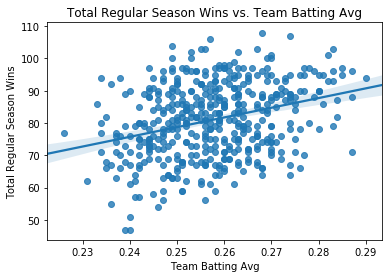

In [6]:
# Rename copy_dfm to df_research for clarity
df_research = copy_dfm

# Now we want to plot this and fit a linear regression to the plot using Seaborn and sklearn's linear_model
lreg_winsbavg = lmod.LinearRegression()
lreg_X = [[x] for x in df_winsbavg["Batting Avg"].values]
lreg_Y = [[y] for y in df_winsbavg["Wins"].values]
lreg_fit = lreg_winsbavg.fit(lreg_X, lreg_Y)

regplot_winsbavg = sea.regplot(x = "Batting Avg", y = "Wins", data = df_winsbavg)
regplot_winsbavg.set(xlabel = "Team Batting Avg", ylabel = "Total Regular Season Wins",
                     title = "Total Regular Season Wins vs. Team Batting Avg")
regplot_winsbavg

In [7]:
# From the graph above, it seems like a higher team batting average tends to contribute to more regular season wins.
# Using the linear regression we can create a linear equation in the form y = mx + b to predict how many regular
# season wins are expected based off of JUST a hypothetical whole season team batting average.
slope0 = lreg_winsbavg.coef_[0][0]
intercept0 = lreg_winsbavg.intercept_[0]

print("# of Regular Season Wins = " + str(slope0) + " * <Batting Avg> + " + str(intercept0))
print("Pearson Correlation: " + str(pr(df_winsbavg["Batting Avg"], df_winsbavg["Wins"])[0]))

# You've just completed your first basic statistic analyzation!

# of Regular Season Wins = 300.3002325179685 * <Batting Avg> + 3.6433407808888205
Pearson Correlation: 0.313334368854188


<h4><center>Results and Where to Go From Here</center></h4>
<p>
    The linear model that you just created is technically a predictive model by itself already, however, it is not
    very accurate as it is based around just one statistic, claiming there is a perfect correlation between a team's
    batting average in a season and their total regular season wins in that season.  We <i>have</i> found that there
    is a <b>moderate</b> correlation between a team's batting average and their season win total, with a Pearson
    Correlation of about 0.313.  This makes sense because a team that gets more hits is getting more runners
    on base, thus increasing the chances of scoring or increasing the number of runs scored every game.
    <br><br>
    From here, it is up to the data scientist to research more trends and relationships on their own in order to
    add the number of factors involved in projected regular season win totals for each MLB team.  This portion of
    the process for large-scale, highly-funded models is one of the most, if not the most, time-consuming parts of
    the predictive model creation process, as this is where the model is fine-tuned to account for the most up to
    date ideas in sabermetrical analysis of baseball.
    <br><br>
    In the next few sections, we will be performing the same steps to analyze how the following statistics contribute
    to total regular season wins: <b>Runs Scored</b> (another batting statistic), <b>WHIP</b> (a pitching statistic),
    and <b><i>WAR</i></b> (advanced statistic for both pitchers and field players).  <i>Note: There will be less
    explanation along the way of steps we already explained in the example.</i>
    
</p>

<h3>2.3 Relationship: Runs Scored and Wins</h3>
<p>
    Next, I am going to explore the relationship between runs scored and wins.  Do we expect there to be a
    correlation?  Most likely, yes, as teams that score more runs during a whole season also score more runs during
    every game on average than teams that score less runs during a whole season.
</p>

In [8]:
# Rename df_winsbavg to df_factors as this will now maintain important data on factors involved in our eventual
# complete predictive model
df_factors = df_winsbavg

# Add years, teams, and runs scored to our factors table
df_factors.insert(0, "Year", df_research["Year"].astype(int))
df_factors.insert(1, "Team", df_research["Tm"])
df_factors["Runs Scored"] = df_research["R_b"].astype(float)
df_factors

,Year,Team,Batting Avg,Wins,Runs Scored
0,2005,ARI,0.256,77.0,696.0
1,2005,ATL,0.265,90.0,769.0
2,2005,BAL,0.269,74.0,729.0
3,2005,BOS,0.281,95.0,910.0
4,2005,CHC,0.270,79.0,703.0
5,2005,CHW,0.262,99.0,741.0
6,2005,CIN,0.261,73.0,820.0
7,2005,CLE,0.271,93.0,790.0
8,2005,COL,0.267,67.0,740.0
9,2005,DET,0.272,71.0,723.0


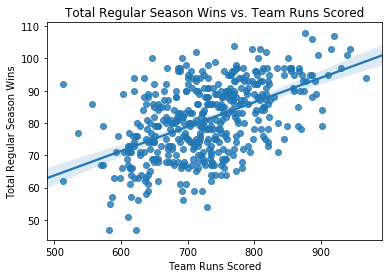

In [9]:
# Plot, Fit Linear Regression, Create equation, and find Pearson Correlation similar to example
lreg_winsruns = lmod.LinearRegression()
winsruns_X = [[x] for x in df_factors["Runs Scored"].values]
winsruns_Y = [[y] for y in df_factors["Wins"].values]
winsruns_fit = lreg_winsruns.fit(winsruns_X, winsruns_Y)

regplot_winsruns = sea.regplot(x = "Runs Scored", y = "Wins", data = df_factors)
regplot_winsruns.set(xlabel = "Team Runs Scored", ylabel = "Total Regular Season Wins",
                     title = "Total Regular Season Wins vs. Team Runs Scored")
regplot_winsruns

In [10]:
# The plot above shows that there is an even stronger correlation between Team Runs Scored in a Season and Total
# Regular Season Wins for that season.  The equation for the regression in y = mx + b format is:
slope1 = lreg_winsruns.coef_[0][0]
intercept1 = lreg_winsruns.intercept_[0]

print("# of Regular Season Wins = " + str(slope1) + " * <Runs Scored> + " + str(intercept1))
print("Pearson Correlation: " + str(pr(df_factors["Runs Scored"], df_factors["Wins"])[0]))

# of Regular Season Wins = 0.07568260885548721 * <Runs Scored> + 25.911759468227686
Pearson Correlation: 0.5189365795325355


<h4><center>Analysis Results</center></h4>
<p>
    As expected, there is a clear correlation between team runs scored in a season and wins in a season.  As stated
    before, a team that scores more runs is stastically more likely to win more games than a team that scores less
    runs as scoring runs is the only way to raise your teams' score in baseball, a sport where the objective is to
    score more runs than the other team.
    <br><br>
    The equation for the linear regression is given in the output above and the Pearson Correlation is about 0.519,
    which is a solid, moderate positive correlation.
</p>

<h3>2.4 Relationship: WHIP and Wins</h3>
<p>
    <b>WHIP</b> is a pitching statistic that stands for <b>Walks plus Hits per Innings Pitched</b>, or in other
    terms, it's the number of baserunners a team allows to safely reach base per innning.  A WHIP of 0.0 means that
    a team never allowed a baserunner to safely reach base while a WHIP of 2.0 means that a team allows an average
    of 2.0 baserunners to safely reach base per inning.  A team with a lower season WHIP means its pitchers performed
    well that season while a team with a higher season whip had pitchers that performed more poorly.  In general,
    anything less than 1.0 is elite, while most players' and teams' WHIP will tend to be somewhere between 1.2 and
    1.8.  We are likely to see that WHIP is negatively correlated with Wins, as lower numbers means better.
</p>

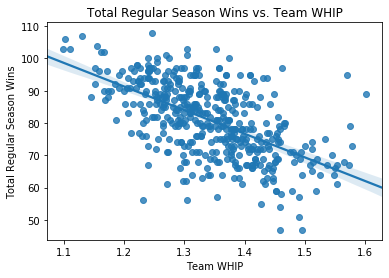

In [11]:
# Add WHIP to factors table
df_factors["WHIP"] = df_research["WHIP"].astype(float)

# Plot, Fit Linear Regression, Create equation, and find Pearson Correlation similar to example
lreg_winswhip = lmod.LinearRegression()
winswhip_X = [[x] for x in df_factors["WHIP"].values]
winswhip_Y = [[y] for y in df_factors["Wins"].values]
winswhip_fit = lreg_winswhip.fit(winswhip_X, winswhip_Y)

regplot_winswhip = sea.regplot(x = "WHIP", y = "Wins", data = df_factors)
regplot_winswhip.set(xlabel = "Team WHIP", ylabel = "Total Regular Season Wins",
                     title = "Total Regular Season Wins vs. Team WHIP")
regplot_winswhip

In [12]:
# The plot above shows that there is an evident negative correlation between Team WHIP and Total Regular Season Wins.
# The equation for the regression in y = mx + b format is:
slope2 = lreg_winswhip.coef_[0][0]
intercept2 = lreg_winswhip.intercept_[0]

print("# of Regular Season Wins = " + str(slope2) + " * <WHIP> + " + str(intercept2))
print("Pearson Correlation: " + str(pr(df_factors["WHIP"], df_factors["Wins"])[0]))

# of Regular Season Wins = -73.11937611201859 * <WHIP> + 179.04576207047504
Pearson Correlation: -0.5865951742238298


<h4><center>Analysis Results</center></h4>
<p>
    As expected, there is a negative correlation between Team WHIP for a season and wins in a season.  As stated
    before, a team that lets less runners on base per innings is going to end up giving up less runs as baserunners
    are required to score runs.
    <br><br>
    The equation for the linear regression is given in the output above and the Pearson Correlation is about -0.587,
    which is a solid, moderate negative correlation.
</p>

<h3>2.5 Relationship: WAR and Wins</h3>
<p>
    <b>WAR</b>, short for <b>Wins Above Replacement</b>, measures the "number of wins" a player's presence in the
    lineup for a whole 162-game season adds or subtracts from the team's overall record if the average league player
    were to play instead.  A positive WAR means the player generally helps the team while a negative war means the
    player is costing their team wins (causing them to lose more).  Calculating WAR involves several calculations and
    involves many different statistics, but we won't need to do that as Baseball Reference has done the calculations
    for us.
    <br><br>
    The data for Team WAR is an average of the players' WARs for a given season, which means we can use Team WAR to
    take a quick glance at the teams with the most "win-helpful" players.
</p>

In [28]:
# Re-format/Sort and then add WAR to factors table
build_warscol = pd.Series([])
switch = {
    "ARI" : 0,
    "ATL" : 1,
    "BAL" : 2,
    "BOS" : 3,
    "CHC" : 4,
    "CHW" : 5,
    "CIN" : 6,
    "CLE" : 7,
    "COL" : 8,
    "DET" : 9,
    "MIA" : 10,
    "HOU" : 11,
    "KCR" : 12,
    "LAA" : 13,
    "LAD" : 14,
    "MIL" : 15,
    "MIN" : 16,
    "NYM" : 17,
    "NYY" : 18,
    "OAK" : 19,
    "PHI" : 20,
    "PIT" : 21,
    "SDP" : 22,
    "SEA" : 23,
    "SFG" : 24,
    "STL" : 25,
    "TBR" : 26,
    "TEX" : 27,
    "TOR" : 28,
    "WSN" : 29,
    "FLA" : -1
}
for yr in range(2005, 2020):
    wars = df_research[df_research["Year"] == yr]
    wars = wars["Total"]
    wars = wars.replace("TBD", "TBR")
    wars = wars.replace("FLA", "MIA")
    build_local = []
    
    for war in wars.astype(str):
        team_code = war[0] + war[1] + war[2]
        local_index = switch.get(team_code)
        if local_index is not None:
            build_local.insert(local_index, team_code)
    if build_warscol is None:
        build_warscol = build_local
    else:
        build_warscol = build_warscol.append(pd.Series(build_local))
build_warscol = build_warscol.reset_index()

In [ ]:
# Then, you would average out all of you models against the average win amount for each team over the past 15 seasons
# and then find the average prediction of all the mini models.